<a href="https://colab.research.google.com/github/scottspurlock/csc4422-s2024/blob/main/demos/day04_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DMML Day 4 Demo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# download csv file from Drive and upload in Colab
#'https://drive.google.com/uc?export=download&id=1_bPlDGeCsidzvrQ4YBuEVwE1Zmy2kvva'

# or pandas can read directly from a URL

url = 'https://drive.google.com/uc?export=download&id=1_bPlDGeCsidzvrQ4YBuEVwE1Zmy2kvva'
df = pd.read_csv(url)
df.head()



,ID,Born,Bio,salary,Number of cats owned,Type of housing,Car Size
0,1005,10/2/1982,NaN,97769,5,Apartment,Small
1,4985,1993,Unapologetic cat lover,93802,7,House,NaN
2,7313,4/1/2002,NaN,52682,3,Town House,Small
3,1493,NaN,NaN,63618,2,House,Large
4,5537,2/28/1995,NaN,12124,2,House,Medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    63 non-null     int64 
 1   Born                  62 non-null     object
 2   Bio                   2 non-null      object
 3   salary                63 non-null     object
 4   Number of cats owned  63 non-null     int64 
 5   Type of housing       56 non-null     object
 6   Car Size              60 non-null     object
dtypes: int64(2), object(5)
memory usage: 3.6+ KB


In [ ]:
df.nunique()


ID                      60
Born                    55
Bio                      2
salary                  58
Number of cats owned     8
Type of housing          4
Car Size                 3
dtype: int64

In [ ]:
df['Car Size'].value_counts(dropna=False)

Small     30
Large     21
Medium     9
NaN        3
Name: Car Size, dtype: int64

## Renaming columns

In [ ]:
df = df.rename(columns={
    'salary': 'Salary',
    'Number of cats owned': 'Cats',
    'Type of housing': 'Housing',
    'Car Size': 'Car'
})


In [ ]:
df

,ID,Born,Bio,Salary,Cats,Housing,Car
0,1005,10/2/1982,NaN,97769,5,Apartment,Small
1,4985,1993,Unapologetic cat lover,93802,7,House,NaN
2,7313,4/1/2002,NaN,52682,3,Town House,Small
3,1493,NaN,NaN,63618,2,House,Large
4,5537,2/28/1995,NaN,12124,2,House,Medium
...,...,...,...,...,...,...,...
58,2435,9/1/1986,NaN,14741,4,House,Large
59,1463,1/3/1984,NaN,70020,2,House,Small
60,6420,7/30/1997,NaN,13052,2,House,Large
61,2985,3/4/1988,NaN,90816,7,House,Medium


## Duplicates

In [ ]:
# Drop duplicates
print('There are', df.shape[0], 'rows before')
df = df.drop_duplicates()
print('There are', df.shape[0], 'rows after')



There are 63 rows before
There are 61 rows after


## Dropping Columns

In [ ]:
df = df.drop(['ID', 'Bio'], axis=1)

In [ ]:
df.head()

,Born,Salary,Cats,Housing,Car
0,10/2/1982,97769,5,Apartment,Small
1,1993,93802,7,House,NaN
2,4/1/2002,52682,3,Town House,Small
3,NaN,63618,2,House,Large
4,2/28/1995,12124,2,House,Medium


## Missing Values

In [ ]:
df[df['Housing'].isna()]

,Born,Salary,Cats,Housing,Car
10,3/18/1999,77524,6,NaN,Medium
16,5/29/1985,84278,3,NaN,NaN
23,3/22/1994,92671,3,NaN,Small
24,9/10/2005,84557,3,NaN,Small
38,6/22/1987,17858,2,NaN,Small
42,8/1/2000,58616,4,NaN,Small
48,5/18/2001,36516,1,NaN,Medium


In [ ]:
# Estimate percent missing
df.isna().sum() / df.shape[0]


Born       0.016393
Salary     0.000000
Cats       0.000000
Housing    0.114754
Car        0.049180
dtype: float64

In [ ]:
# Drop all rows with any missing values
# (Be careful here. This is not always a good idea.)
# df = df.dropna()
df = df.dropna(subset=['Born', 'Car'])
df.head()

,Born,Salary,Cats,Housing,Car
0,10/2/1982,97769,5,Apartment,Small
2,4/1/2002,52682,3,Town House,Small
4,2/28/1995,12124,2,House,Medium
5,8/8/2004,-25000,1,Town House,Large
6,3/27/1996,40711,1,Apartment,Medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 62
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Born     57 non-null     object
 1   Salary   57 non-null     object
 2   Cats     57 non-null     int64 
 3   Housing  51 non-null     object
 4   Car      57 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.7+ KB


In [ ]:
# For nominal data, we could count values
df['Housing'].value_counts(dropna=False)

# We could set NaN values to the mode or to a new value (“None”)
df['Housing'] = df['Housing'].fillna('None')


In [ ]:
df['Housing'] = df['Housing'].replace(['apt', 'apartment', 'apart'], 'Apartment')
df['Housing'].value_counts()



House         27
Apartment     15
Town House     9
None           6
Name: Housing, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 62
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Born     57 non-null     object
 1   Salary   57 non-null     object
 2   Cats     57 non-null     int64 
 3   Housing  57 non-null     object
 4   Car      57 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.7+ KB


In [ ]:
# pd.to_numeric(df['Salary'])
df[df['Salary'] == '?']

,Born,Salary,Cats,Housing,Car
12,1/31/1989,?,3,House,Large
21,1/28/1986,?,2,House,Small
27,1/5/1999,?,3,Apartment,Small


In [ ]:
med = df['Salary'].median()

TypeError: could not convert string to float: '?'

In [ ]:
# Replace the ?’s with NaN’s (valid for numeric column)
df['Salary'] = df['Salary'].replace('?', np.nan)
df['Salary'] = pd.to_numeric(df['Salary'])

# Now we can calculate median
med = df['Salary'].median()

# Fill in the NaN’s with the median
df['Salary'] = df['Salary'].fillna(med)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 62
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Born     57 non-null     object 
 1   Salary   57 non-null     float64
 2   Cats     57 non-null     int64  
 3   Housing  57 non-null     object 
 4   Car      57 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [ ]:
df['Born'] = pd.to_datetime(df['Born'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 62
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Born     57 non-null     datetime64[ns]
 1   Salary   57 non-null     float64       
 2   Cats     57 non-null     int64         
 3   Housing  57 non-null     object        
 4   Car      57 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.7+ KB


<Axes: >

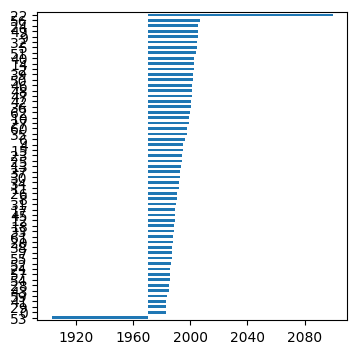

In [ ]:
# Sorted bar charts can also help
df['Born'].sort_values().plot(kind='barh', figsize=(4, 4))



In [ ]:
# We may decide to remove the smallest and largest
largest = df['Born'].max()
smallest = df['Born'].min()
mask = (df['Born'] != largest) & (df['Born'] != smallest)
df = df[mask]



In [ ]:
df.describe(include='all')

<ipython-input-45-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Born,Salary,Cats,Housing,Car
count,55,55.000000,55.000000,55,55
unique,51,NaN,NaN,4,3
top,1982-10-02 00:00:00,NaN,NaN,House,Small
freq,2,NaN,NaN,25,29
first,1982-10-02 00:00:00,NaN,NaN,NaN,NaN
last,2007-02-12 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,49064.381818,3.218182,NaN,NaN
std,NaN,28894.667939,1.685350,NaN,NaN
min,NaN,-25000.000000,-1.000000,NaN,NaN
25%,NaN,26304.000000,2.000000,NaN,NaN


In [ ]:
# min-max scaling
sal_min = df['Salary'].min()
sal_max = df['Salary'].max()
sal_range = sal_max - sal_min
sal_norm = (df['Salary'] - sal_min) / sal_range
sal_norm


0     0.995217
2     0.629723
4     0.300943
5     0.000000
6     0.532681
7     0.421745
8     1.000000
9     0.671852
10    0.831103
11    0.919333
12    0.602194
13    0.325708
14    0.190274
15    0.618439
17    0.717694
18    0.901953
20    0.572921
21    0.602194
23    0.953891
24    0.888115
25    0.676432
26    0.902099
27    0.602194
28    0.410039
29    0.791025
30    0.633849
31    0.977059
32    0.364197
33    0.707845
34    0.919333
35    0.672930
36    0.471340
37    0.451990
38    0.347425
39    0.610568
40    0.850769
41    0.552526
42    0.677827
43    0.809467
45    0.545716
46    0.295430
47    0.361441
48    0.498675
49    0.632974
50    0.359422
51    0.483370
52    0.322157
54    0.348130
55    0.300116
56    0.593820
57    0.722509
59    0.770272
60    0.308466
61    0.938853
62    0.435599
Name: Salary, dtype: float64

In [ ]:
sal_mean = df['Salary'].mean()
sal_std = df['Salary'].std()
sal_stand = (df['Salary'] - sal_mean) / sal_std

sal_stand

0     1.685592
2     0.125200
4    -1.278450
5    -2.563254
6    -0.289098
7    -0.762714
8     1.706011
9     0.305060
10    0.984944
11    1.361622
12    0.007670
13   -1.172721
14   -1.750924
15    0.077025
17    0.500771
18    1.287422
20   -0.117301
21    0.007670
23    1.509158
24    1.228345
25    0.324614
26    1.288045
27    0.007670
28   -0.812689
29    0.813839
30    0.142816
31    1.608069
32   -1.008400
33    0.458722
34    1.361622
35    0.309663
36   -0.550980
37   -0.633590
38   -1.080005
39    0.043420
40    1.068904
41   -0.204376
42    0.330567
43    0.892574
45   -0.233447
46   -1.301984
47   -1.020167
48   -0.434280
49    0.139078
50   -1.028784
51   -0.499621
52   -1.187879
54   -1.076994
55   -1.281980
56   -0.028081
57    0.521329
59    0.725242
60   -1.246333
61    1.444959
62   -0.703569
Name: Salary, dtype: float64